<a href="https://colab.research.google.com/github/AwkwardJ/BTCForcast/blob/main/Authoring_BTC_forecaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bitcoin forecasting with Tensorflow and Facebook Prophet
## Nicholas Stewart, Nada Aly, Julian Rintha

In this project we used several libraries to obtain, process and create models to forecast bitcoin prices. The goal was to be able to use this model to attempt to predict a 30-day forecast of bitcoin prices from 11/01/2021 to 12/01/2021. Using Twint, Yahoo Finace, Flair, Tensorflow, Pandas, Numpy, Facebook Prophet and other standard libraries we created 2 models that attempt this forecast.

# Data

Here is where all of the preprocessing is done. We first get tweets to be converted into vectors for sentiment analysis. We plan on including this with closing prices obtained from the Yahoofinance library to get the features for our model.

In [ ]:
import pandas as pd

In [ ]:
%pip install twint
%pip install git+https://github.com/twintproject/twint.git@origin/master#egg=twint
import twint
import nest_asyncio

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to /tmp/pip-install-tv_6jagr/twint_65950d857bf64740be36961f9518eb6b
  Running command git clone -q https://github.com/twintproject/twint.git /tmp/pip-install-tv_6jagr/twint_65950d857bf64740be36961f9518eb6b
  Running command git checkout -q origin/master


Below is code for retreiving tweets using Twint. Twint is a webscrapping library for twitter.

In [ ]:
import datetime
import time

def runSearch():
  #time.sleep(30)
  try:
    twint.run.Search(c)
  except Exception:
    #time.sleep(10)
    try: twint.run.Search(c)
    except Exception: pass


start_date = datetime.datetime(2021,1,1)
first_date = datetime.datetime(2021,1,1)
start_end_date = start_date + datetime.timedelta(days=1)
end_date = datetime.datetime(2021,2,1)

df = twint.storage.panda.Tweets_df;
df_temp = twint.storage.panda.Tweets_df;

while (start_date != end_date):
  c = twint.Config()
  c.Search = "bitcoin"
  c.Limit = 1
  c.Lang = 'en'
  c.Since = start_date.strftime("%Y-%m-%d")
  c.Until = start_end_date.strftime("%Y-%m-%d")
  c.Pandas = True
  nest_asyncio.apply()
  if (start_date == first_date):
    runSearch()
    df = twint.storage.panda.Tweets_df
  else:
    runSearch()
    df_temp = twint.storage.panda.Tweets_df
    if (df_temp.empty):
      runSearch()
    df_temp = twint.storage.panda.Tweets_df
    df = pd.concat([df, df_temp], ignore_index=True)
  start_date = start_end_date
  start_end_date += datetime.timedelta(days=1)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1345520244564094979 2021-01-02 23:59:59 +0000 <ThisNigga_QUE> That Bitcoin I got from Meg moving on up out here
1345520237945483264 2021-01-02 23:59:57 +0000 <EstebanOcampo86> @arielsbdar Es una burbuja el bitcoin?? Así lo ven @cbuteler y @carod2015
1345520226629201920 2021-01-02 23:59:55 +0000 <franciscojaav13> Huelo mucha euforia y mucho "FOMO" en mi TL sobre el Bitcoin (Enhorabuena a los agraciados), cada uno que crea arriesgar lo que vea conveniente y luego asuma sus consecuencias, yo de entrar lo haría con una porcentaje muy reducido y "muy conservador" del 0,5%-1% de mi cartera.
1345520220774002693 2021-01-02 23:59:53 +0000 <Shinoha94456815> @luke_chulack @CryptoMessiah For sth to be used as a store of value, they need to be stable in price, which Bitcoin fails to do so.
1345520220472037376 2021-01-02 23:59:53 +0000 <CryptoWatchBot> @Bitcoin, #Bitcoin is the coin with the best risk-adjusted returns o

This code should get a single tweet from everyday in the window. However, there is a compounding problem here. Firstly, we chose to use twint because tweepy no longer works. Tweepy no longer works due to Twitter developing an official API to search and view twitter data. To get access to this official API we needed to create a developer account. We did such but were unpleasantly surprised to find that the twitter API relied on YAML files to make requests to it. A file format that we simply can not incorporate into this environment without significant errors. The grader would need to install the YAML files in their local drive for this notebook to run. Secondly, the basic access only gave us tweets from the last 30 days. To get full archive access we would need to be approved as an institution or research organization.
 
With this method out of the question we moved to third party applications. We found twint, a web scraper that will allow us to get some tweets. There are issues here as well. Firstly, twint is not behaving properly. The above code block asks for just a single tweet from a given day. This library returns a few tweets it can find for that day. Secondly, Twitter itself sometimes blocks this bot from grabbing tweets. The webscraper generates a fake user agent to access Twitter. Twitter has been progressively becoming more resistant to passive attacks like this so it will deny the bot access. Twitter has a new model that you can not view content unless you are logged in. To bypass this twint creates a fake user. However, Twitter is wise to this sometimes and will deny the fake user access. This means the web scraper can't obtain any information from the webpage as it can not get onto the page it needs. You can see above it skips whole days at a time. This leads to a sparse matrix for the tweets. This means some days in our predictor would be missing sentiment.
 
A work around we figured would be to just create a list of sentiment out of random days and call them the sentiment for the specific day we are looking at.
The logic there being, the average sentiment for the day is very volatile. The result is essentially a coin flip. However, since this list is a 'fake' list, the sentiments will have no actual correlation with the day it is associated with.
 
We have concluded there is no reliable way to get the tweets for a given day and that any list we do make will skew the results of the predictor as they will not be accurate/actually associated with the closing price of the coin. For these reasons we have decided to exclude the sentiment in the price predictor development.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               423 non-null    object 
 1   conversation_id  423 non-null    object 
 2   created_at       423 non-null    float64
 3   date             423 non-null    object 
 4   timezone         423 non-null    object 
 5   place            423 non-null    object 
 6   tweet            423 non-null    object 
 7   language         423 non-null    object 
 8   hashtags         423 non-null    object 
 9   cashtags         423 non-null    object 
 10  user_id          423 non-null    int64  
 11  user_id_str      423 non-null    object 
 12  username         423 non-null    object 
 13  name             423 non-null    object 
 14  day              423 non-null    int64  
 15  hour             423 non-null    object 
 16  link             423 non-null    object 
 17  urls            

# Tweet Sentiment Analysis

In [ ]:
%pip install importlib-metadata
%pip install flair
import flair

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence

#make a classifier that will later test if phrase is positive or negative
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2021-12-12 00:18:33,172 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


In [ ]:
#create sentiment and confidence list
sentiment = []
confidence = []

#loop through tweets
for sentence in df['tweet']:  #tokenizing our sentence (Phrase should be changed to what ehe colum with tweets is called)
  if sentence.strip() == "":  #if there is an empty tweet or phrase there will be an empty sentiment and confidence analysis
    sentiment.append("")
    confidence.append("")
  
  else:
    sample = flair.data.Sentence(sentence)    #splits samples into tokens
    sentiment_model.predict(sample)

    sentiment.append(sample.labels[0].value)
    confidence.append(sample.labels[0].score)

In [ ]:
data = {}
df = pd.DataFrame(data)
#make the new columns in the table to show sentiment and confidence of the tweet then show table
df['sentiment'] = sentiment
print(df['sentiment'])

0      POSITIVE
1      NEGATIVE
2      POSITIVE
3      NEGATIVE
4      POSITIVE
         ...   
418    POSITIVE
419    POSITIVE
420    NEGATIVE
421    NEGATIVE
422    NEGATIVE
Name: sentiment, Length: 423, dtype: object


The above is the sentiment analysis of all of the tweets that twint was able to grab. Again, this is a 'sparse' list and the values here DO NOT correlate 1 to 1 with the days of the year/window we want to create a model for. This list will not be used in the predictor development because it will skew the model based on fake data.

Importing libraries to load in BTC-USD prices and build a TF model

In [ ]:
%pip install yfinance
%pip install yahoofinancials
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

import os
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import random

     |████████████████████████████████| 6.3 MB 7.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=f1e38466d176dea1c230eb910faac7b64b27d6c4a38c8e952114281077cc5d70
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


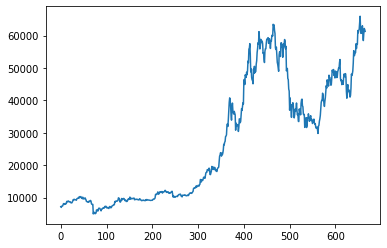

In [ ]:
bitcoin_df = yf.download('BTC-USD', start = '2020-01-01', end='2021-10-31', progress=False)
pricedf = bitcoin_df.reset_index()['Close']
import matplotlib.pyplot as plt
plt.plot(pricedf)

This is the plot of the closing prices from the specified window. These values must be normalized to be used by the predictor.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normal = MinMaxScaler(feature_range=(0,1))
pricedf = normal.fit_transform(np.array(pricedf).reshape(-1,1))

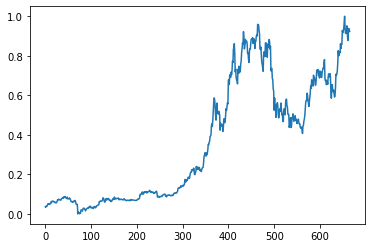

In [ ]:
plt.plot(pricedf)

This is the graph after the values have been normalized from 0-1

In [ ]:
training_size=int(len(pricedf)*0.7)
test_size= len(pricedf) - training_size
train_data = pricedf[0:training_size,:]
test_data = pricedf[training_size:len(pricedf), :1]

Splitting the data into training and test sets. The training data is 70% of the data and the test data is the remaining 30%.

In [ ]:
print(train_data.shape)

(466, 1)


In [ ]:
#consider timesteps needed to predict a future price
#the predictions at timestep +1 will be the y_train(label)
#x_train is the previous timesteps we have considered
def create_dataset(dataset, timestep):
  x_data, y_data = [], []
  for i in range(len(dataset) - timestep-1):
    element = dataset[i:(i+timestep), 0]
    x_data.append(element)
    y_data.append(dataset[i + timestep, 0])
  return np.array(x_data), np.array(y_data)

In [ ]:
timestep = 100
x_train, y_train = create_dataset(train_data, timestep)
x_test, y_test = create_dataset(test_data, timestep)

The above code creates a large dataset for everyday in the training/test set. The x array is the previous days considered and the y array is the label(next day) we are trying to find the price for.

In [ ]:
x_test.shape

(99, 100)

In [ ]:
x_train.shape

(365, 100)

In [ ]:
y_train.shape

(365,)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

# Price Predictor Development

Below is a Long Short Term Memory Recurrent Neural Network, built in tensorflow. Each LSTM layer consists of 100 neurons and is followed by a dropout. All of these LSTM layers lead to 1 dense layer, the price. After predicting a price we can invert the normal transform to get back a predicted price in USD.

In [ ]:
RNN_model = Sequential([
    LSTM(100, return_sequences=True,input_shape=(100,1),activation='relu'),
    Dropout(0.2),
    LSTM(100, return_sequences=True,activation='relu'),
    Dropout(0.2),
    LSTM(100, activation='relu'),
    Dense(1)
])
RNN_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
RNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 100)          40800     
                                                                 
 dropout_2 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 100)          80400     
                                                                 
 dropout_3 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-tr

We then train the model on the modified data set retrieved from Yahoofinance. We use the test data as validation to see how well the network is learning. 

In [ ]:
RNN_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
12/12 [==============================] - 3s 265ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 0.0052 - val_accuracy: 0.0101
Epoch 2/20
12/12 [==============================] - 3s 261ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0054 - val_accuracy: 0.0101
Epoch 3/20
12/12 [==============================] - 3s 259ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0101
Epoch 4/20
12/12 [==============================] - 3s 261ms/step - loss: 0.0022 - accuracy: 0.0000e+00 - val_loss: 0.0082 - val_accuracy: 0.0101
Epoch 5/20
12/12 [==============================] - 3s 263ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0062 - val_accuracy: 0.0101
Epoch 6/20
12/12 [==============================] - 3s 262ms/step - loss: 0.0022 - accuracy: 0.0000e+00 - val_loss: 0.0046 - val_accuracy: 0.0101
Epoch 7/20
12/12 [==============================] - 3s 262ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0046 -

The network is now trained. We will use the network to predict prices in the test set as well as the training set. By doing this, we can ensure the model has at least a baseline concept of what it is trying to accomplish. The problem here is that, unless we test against a real open-ended data set we will not know how well it is predicting. This is the case of over-fitting. That is when the model has memorized the dataset and seems to be performing well when in reality it is just copying the dataset it was given.

In [ ]:
train_predict=RNN_model.predict(x_train)
test_predict=RNN_model.predict(x_test)

Using the model to predict values from the training set and values from the test set.

In [ ]:
train_predict=normal.inverse_transform(train_predict)
test_predict=normal.inverse_transform(test_predict)

Reverting the normalization back into the price format so we can view the predicted prices.

In [ ]:
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

28057.70072351852
50122.17943352012


Loss metrics

The code below displays the actual prices of BTC in blue and then the predicted values for the training set in orange and the predicted values of the test set in green. It does a decent job predicting data it has seen at least once. The real test will be generating the 30 day forecast.

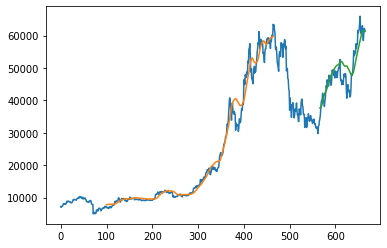

In [ ]:
timesteps = 100
train_predict_plot = np.empty_like(pricedf)
train_predict_plot[:, :] = np.nan
train_predict_plot[timesteps:len(train_predict) + timesteps, :] = train_predict

test_predict_plot = np.empty_like(pricedf)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(timesteps * 2)+1:len(pricedf)-1, :] = test_predict

plt.plot(normal.inverse_transform(pricedf))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

### Formatting and reshaping the initial test data to be used to forecast several days.

The last 100 elements of the test data will be used to create a forecast list. Since the model does not have data from the days we are trying to forecast over, the list will need to progressively add and drop values. It will be adding previous predictions to the tail and removing a value from the head. This way the model is continuously using the previous 100 days to predict.

In [ ]:
len(test_data)

200

In [ ]:
x_input=test_data[100:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
forecast_input=list(x_input)
forecast_input=forecast_input[0].tolist()

In [ ]:
forecast_input

[0.48050923000630996,
 0.4978430007455841,
 0.5304106992450555,
 0.5643231345509612,
 0.5739748074214402,
 0.5741799074703675,
 0.6106769618697468,
 0.6006912012479095,
 0.5736304774703853,
 0.5609637570641771,
 0.5437738252168941,
 0.5699041091657173,
 0.5882917382400383,
 0.6201973425428632,
 0.648700168037689,
 0.6362836133590739,
 0.6783550489571544,
 0.6655667024295474,
 0.6657077247166219,
 0.6466105672583089,
 0.701755082535566,
 0.6903432236334532,
 0.6895248078639353,
 0.672440498701025,
 0.6509871872162241,
 0.6527214476798753,
 0.6841263364450256,
 0.7270878191967532,
 0.7199808208409303,
 0.7268006535227557,
 0.7304795876400783,
 0.7003260396228776,
 0.7208869994590998,
 0.6878076390710279,
 0.722490991945358,
 0.7199301859661795,
 0.7187409385538913,
 0.6896555879513131,
 0.6914861250921137,
 0.719022727073048,
 0.7269001308873104,
 0.7383329222850533,
 0.7370096300842339,
 0.7666511321303453,
 0.7810741977433009,
 0.6856594016983839,
 0.6738646765688573,
 0.67878144453327

Given a day in the future, the forecast code  looks at the previous 100 days and uses the RNN model to generate a prediction. In the case where we start to run out of days to pull from as the future gets further away, the previous predictions start being added to the list to the model will predict with. 

In [ ]:
forecast_output = []
timesteps = 100
i=0
while(i<30):
  if(len(forecast_input)>100):
    x_input=np.array(forecast_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input = x_input.reshape((1, timesteps, 1))
    yhat = RNN_model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    forecast_input.extend(yhat[0].tolist())
    forecast_input=forecast_input[1:]
    forecast_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1, timesteps, 1))
    yhat = RNN_model.predict(x_input, verbose=0)
    print(yhat[0])
    forecast_input.extend(yhat[0].tolist())
    print(len(forecast_input))
    forecast_output.extend(yhat.tolist())
    i=i+1
print(forecast_output)

[0.927241]
101
1 day input [0.497843   0.5304107  0.56432313 0.57397481 0.57417991 0.61067696
 0.6006912  0.57363048 0.56096376 0.54377383 0.56990411 0.58829174
 0.62019734 0.64870017 0.63628361 0.67835505 0.6655667  0.66570772
 0.64661057 0.70175508 0.69034322 0.68952481 0.6724405  0.65098719
 0.65272145 0.68412634 0.72708782 0.71998082 0.72680065 0.73047959
 0.70032604 0.720887   0.68780764 0.72249099 0.71993019 0.71874094
 0.68965559 0.69148613 0.71902273 0.72690013 0.73833292 0.73700963
 0.76665113 0.7810742  0.6856594  0.67386468 0.67878144 0.65407707
 0.65928087 0.67340384 0.65537437 0.69027025 0.70803195 0.70159185
 0.69313851 0.70970373 0.69301887 0.62064473 0.58540952 0.63261921
 0.6542604  0.62057835 0.61856013 0.62662189 0.61067997 0.59099549
 0.59967793 0.63616525 0.70705843 0.70041406 0.70841879 0.72337976
 0.76274111 0.82577794 0.80028773 0.80294027 0.81933393 0.81611142
 0.86057422 0.83691505 0.85920272 0.8578987  0.92791316 0.9164129
 0.92725222 0.93499468 0.97163576 1.

In [ ]:
day_data = np.arange(1,101)
day_predicted = np.arange(101,131)

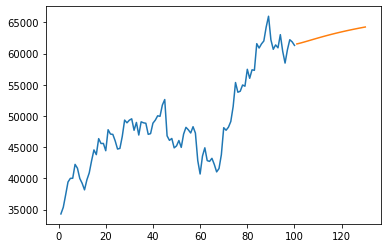

In [ ]:
plt.plot(day_data, normal.inverse_transform(pricedf[566:]))
plt.plot(day_predicted, normal.inverse_transform(forecast_output))
plt.show()

After the predictions have been made and stored, we use np arange to create a structure containing the real price data and one containing the predicted prices. Using pyplot the two structures are plotted showing the 100 days from end of the test set and the predicted 30 days.

This is the output of the price prediction over the next 30 days. This is the time frame from 11/01/2021 - 12/01/2021.

# Facebook Prophet (15 points)

In [ ]:
%pip install pystan==2.19.1.1
%pip install prophet
from prophet import Prophet

In [ ]:
m = Prophet()
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 666 entries, 2020-01-01 to 2021-10-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       666 non-null    float64
 1   High       666 non-null    float64
 2   Low        666 non-null    float64
 3   Close      666 non-null    float64
 4   Adj Close  666 non-null    float64
 5   Volume     666 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 36.4 KB


In [ ]:
import plotly.express as px

px.area(bitcoin_df,
        x= bitcoin_df.index, y='Close')

In [ ]:
bitcoin_df = bitcoin_df.reset_index()
dates = bitcoin_df['Date']

prophet_df = bitcoin_df.rename(columns={'Date': 'ds', 'Close':'y'})
prophet_df.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [ ]:
#initialize
model = Prophet()

#fit
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#forecast for the next 31 days
future = model.make_future_dataframe(periods=30)

#predict
forecast = model.predict(future)

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
691,2021-11-26,62518.748347,58410.868937,67216.165877,61292.583453,63763.092985,128.334704,128.334704,128.334704,128.334704,128.334704,128.334704,0.0,0.0,0.0,62647.083051
692,2021-11-27,62702.456660,58845.144156,67122.350607,61368.161803,64050.045004,92.555771,92.555771,92.555771,92.555771,92.555771,92.555771,0.0,0.0,0.0,62795.012431
693,2021-11-28,62886.164972,58518.547030,67134.355613,61416.032605,64302.815847,2.769883,2.769883,2.769883,2.769883,2.769883,2.769883,0.0,0.0,0.0,62888.934855
694,2021-11-29,63069.873285,58744.294360,67280.739475,61504.984702,64588.335714,-33.431860,-33.431860,-33.431860,-33.431860,-33.431860,-33.431860,0.0,0.0,0.0,63036.441425
695,2021-11-30,63253.581598,58661.746356,67454.194451,61618.691360,64856.531881,-139.398026,-139.398026,-139.398026,-139.398026,-139.398026,-139.398026,0.0,0.0,0.0,63114.183572


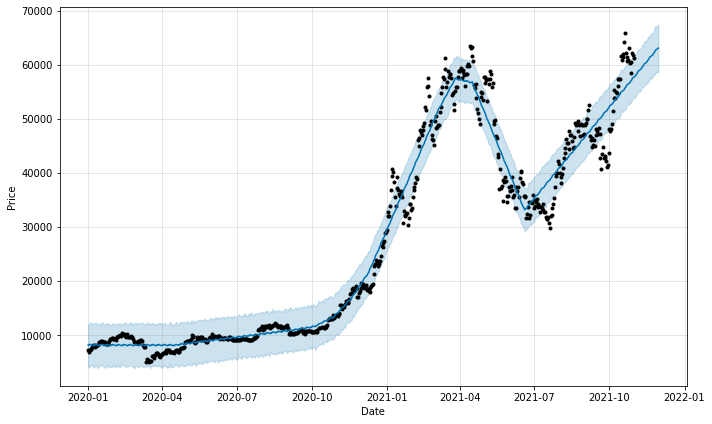

In [ ]:
#visualize with Facebook internal tool
figure_1 = model.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')
#NOTE: Black dots = actual data
#Blue line = prediction
#Blue shaded area = upper and lower limit
#The predicted window size is from Nov. 1st to Nov. 30th, 
#seen displayed at the end of the graph

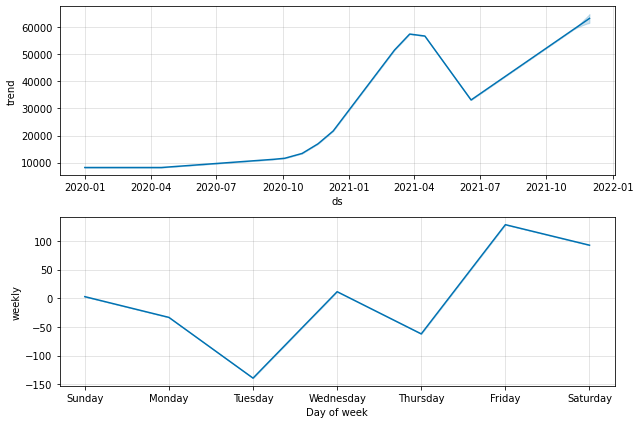

In [ ]:
#visualize forecast
figure_2 = model.plot_components(forecast)

# Results

The real prices from 11/01/2021 12/01/2021

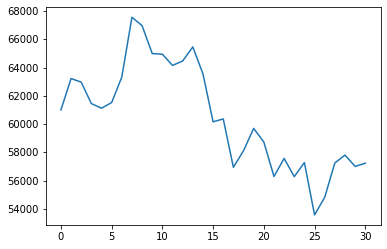

In [ ]:
real_bitcoin_df = yf.download('BTC-USD', start = '2021-11-01', end='2021-12-01', progress=False)
realpricedf = real_bitcoin_df.reset_index()['Close']
import matplotlib.pyplot as plt
plt.plot(realpricedf) 

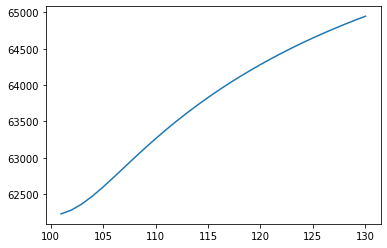

In [ ]:
plt.plot(day_predicted, normal.inverse_transform(forecast_output))
plt.show()

The model predicts in such a way due to the data we have given it, it has seen the price jump several thousands of dollars in a short amount of time. The crypto market is so volatile. The predictor is confident the price of the coin will continue to go up. In reality, the price of the coin has dropped overtime. This is due to a multitude of factors the predictor does not consider. The coin price does not move only due to the closing price of the previous 100 days. However, this is the only data the model considers leading to the incredibly wrong prediction displayed here.
 
However, it is worth noting that the actual price of bitcoin surpasses the maximum price predicted with the model. After that point it declines down as people cash out on the price spike and a million other factors. Perhaps the predictors recognize the coin is on an up trend but fail to accurately model the velocity at which the code can be in price.


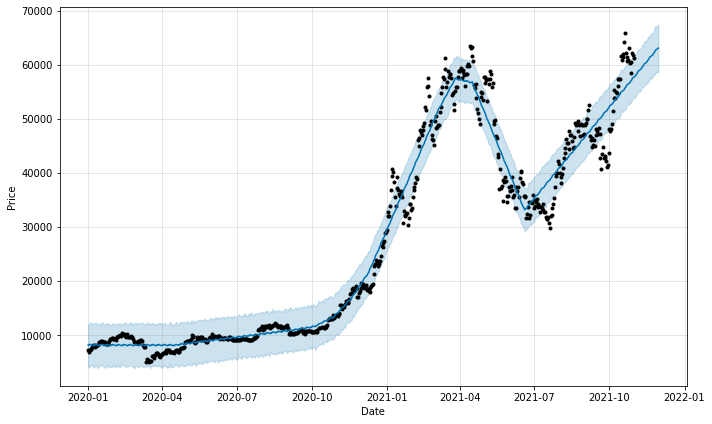

In [ ]:
#Table of prediction vs actual price for prophet
#visualize with Facebook internal tool
figure_1 = model.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')
#NOTE: Black dots = actual data
#Blue line = prediction
#Blue shaded area = upper and lower limit

The Prophet does not do much better. The algorithm again only relies on closing prices as data. This leads to the wildly wrong prediction we see over the target window. Much like the Keras model, the prophet model is confident the price of bitcoin will continue to rise. This is not surprising as the model has been exposed to the volatile dataset that is the closing prices of Bitcoin. It has seen the price skyrocket in short amounts of time. It can recognize an uptrend but fails to properly model the velocity the coin can have. Due to this, both predictors are confident the price will continue to rise but not at the pace it did in real life.

#Predictor Documentation
##Price Predictor Method 1 TensorFlow
Estimating the probability distribution of a time series future given its past is a very important aspect of modern business models. So many companies today rely on machine learning algorithms to give them an edge in understanding various information related to their business. For instance, a financial forecaster that could predict stock prices given the previous time series at input has a lot of fantastic implications. If the model is reliable it could guide investment firms in their decision-making. It could also help novice investors understand market trends and possible outcomes. These models provide a massive door to the fintech industry.
	To create our model that accomplished this we built a Long Short Term Memory Recurrent Neural Network using Tensorflow. This network takes in financial data on Bitcoin from the YahooFinance library. This library allows us to get the closing prices on bitcoin everyday for as long as we would like. We planned on also including sentiment analysis of tweets for those days as input to the model. However, with restrictions in place by Twitter we could only get at best a sparse matrix of tweets for the same window we had prices for. This left us with an option to construct a faux dataset but we opted against it because in most if not most cases the twitter sentiment would have no correlation to the actual prices.
	After processing the financial data using pandas and numpy we create the RNN model. This model has 3 100 neuron LSTM layers with dropout and they all feed into a single dense neuron. After computing the inverse of the normalization we are left with the closing price for that day. This is the price we are predicting. The network considers the previous 100 days and makes a prediction as to what the next day’s closing price will be. After training and testing the model, we observed that the model was either behaving well or it was overfitting. We moved to attempt to forecast a 30 day window with this model.
	To forecast 30 days into the future the predictor considers it’s previous predictions as input. So, in training, the model would take in the previous 100 days and make a prediction. In this use case, the output prediction for 1 day in the future will be appended to the input for the day 2 prediction. These predictions will be considered for day 3 etc etc until we reach 30 days. The complete list of predictions will be the model’s forecast for the 11/01/2021-12/01/2021 window.
	Overall the predictor works decently well. We hypothesize the model can accurately model the uptrends in the coin but it fails to model the velocity at which the price can move. For instance the actual price for early november actually peaks at around 68,000 dollars. The model predicted the price will rise slowly and steadily over the whole month and end at 65,000 dollars. The actual price did start to increase from 10/31 but it increased with such a velocity the predictor can not ‘keep up’ and gets left in this zone where it starts heavily relying on it’s previous predictions being accurate. This leads the prediction to start to become completely incorrect as time goes on.


##Facebook Prophet
Facebook Prophet is a forecasting procedure library that automates the process for data scientists/analysts. It forecasts time-series data based on an additive model where non-linear trends can be fit into yearly, weekly, and daily graph representations. It also will not just predict the future prices of bitcoin but also provide the upper limit and lower limit of predicted prices allowing us to give us a little more wiggle room and more accurate predictions. Including limits will give us more accurate predictions because if the price drops below the lower limit, then there’s a chance that the price will come up and that means it's good to buy now. Vice versa if the price goes above the upper limit, it will be best for selling bitcoin. If you’d like to add additional variables in Prophet for predict, you can do it by using the add_regressor method. We attempted to add sentiment tweet analysis data as a regressor, but unfortunately it was unable to be done with the method we were using and got unexpected results. So as a last minute resort, we decided to not add it and just display the sentiment data separately. We used the Prophet Python API in Google Colab. 
The Prophet always uses a data frame that has two columns: ds and y. The ds is the date stamp column and y is the close price. Close price was chosen because it is the most accurate price that tells how much bitcoin cost that day. If you look at the fourth code block under the “Facebook Prophet” section, from January 2020 to October 2021, the price of Bitcoin skyrocketed around Feb. 2021 to 57k, dipped back to 30k in July 2021, and then skyrocketed again to 66k in October. The next following code block renames date and close price as ‘ds’ and ‘y’ correspondingly because again, the prophet needs those columns to be named those labels. Afterwards, we just need to initialize Prophet() and fit the model with the dataframe. Then, by using the make_future_dataframe function to predict the next 31 days. 

The eighth code block displays the new dataframe with date, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, weekly, weekly_lower, weekly_upper, and yhat. The dates added are November 1st to November 30th 2021. What’s important is that yhat is the predicted value, and the yhat_lower/yhat_upper is the upper/lower limits. The following code blocks after will help visualize the predicted bitcoin price. For example, the first graph has the blue line as the prediction, the shaded area is the lower and upper limit, and the black dots are the actual price up to October 2021. There other two graphs display the trends with the plot_component function. The first shows the trend of the predicted period from the previous graph and then weekly trends. As you can see, the price of Bitcoin rises in the middle of week and then dips after the weekend, which concludes that the price is generally constant. 